In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('top_insta_influencers_data.csv')

In [3]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [5]:
df.shape

(200, 10)

In [6]:
#data cleaning--->selecting only required data
#data visualization seaborn-->statistical data visualization
country=df['country']
country

0              Spain
1      United States
2                NaN
3      United States
4      United States
           ...      
195    United States
196           France
197           Brazil
198    United States
199        Indonesia
Name: country, Length: 200, dtype: object

In [8]:
country=df['country'].value_counts()
country

United States             66
Brazil                    13
India                     12
Indonesia                  7
France                     6
Spain                      5
United Kingdom             4
Colombia                   3
Canada                     3
Mexico                     2
Turkey                     2
Netherlands                2
Switzerland                1
Germany                    1
Czech Republic             1
British Virgin Islands     1
Sweden                     1
Australia                  1
Anguilla                   1
CÃ´te d'Ivoire             1
Puerto Rico                1
United Arab Emirates       1
Italy                      1
Uruguay                    1
Russia                     1
Name: country, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Spain'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'Brazil'),
  Text(4, 0, 'Netherlands'),
  Text(5, 0, 'United Kingdom'),
  Text(6, 0, 'India'),
  Text(7, 0, 'Uruguay'),
  Text(8, 0, 'Turkey'),
  Text(9, 0, 'Indonesia'),
  Text(10, 0, 'Colombia'),
  Text(11, 0, 'France'),
  Text(12, 0, 'Australia'),
  Text(13, 0, 'Italy'),
  Text(14, 0, 'United Arab Emirates'),
  Text(15, 0, 'Puerto Rico'),
  Text(16, 0, "CÃ´te d'Ivoire"),
  Text(17, 0, 'Anguilla'),
  Text(18, 0, 'Switzerland'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'British Virgin Islands'),
  Text(21, 0, 'Czech Republic'),
  Text(22, 0, 'Mexico'),
  Text(23, 0, 'Germany'),
  Text(24, 0, 'Russia')])

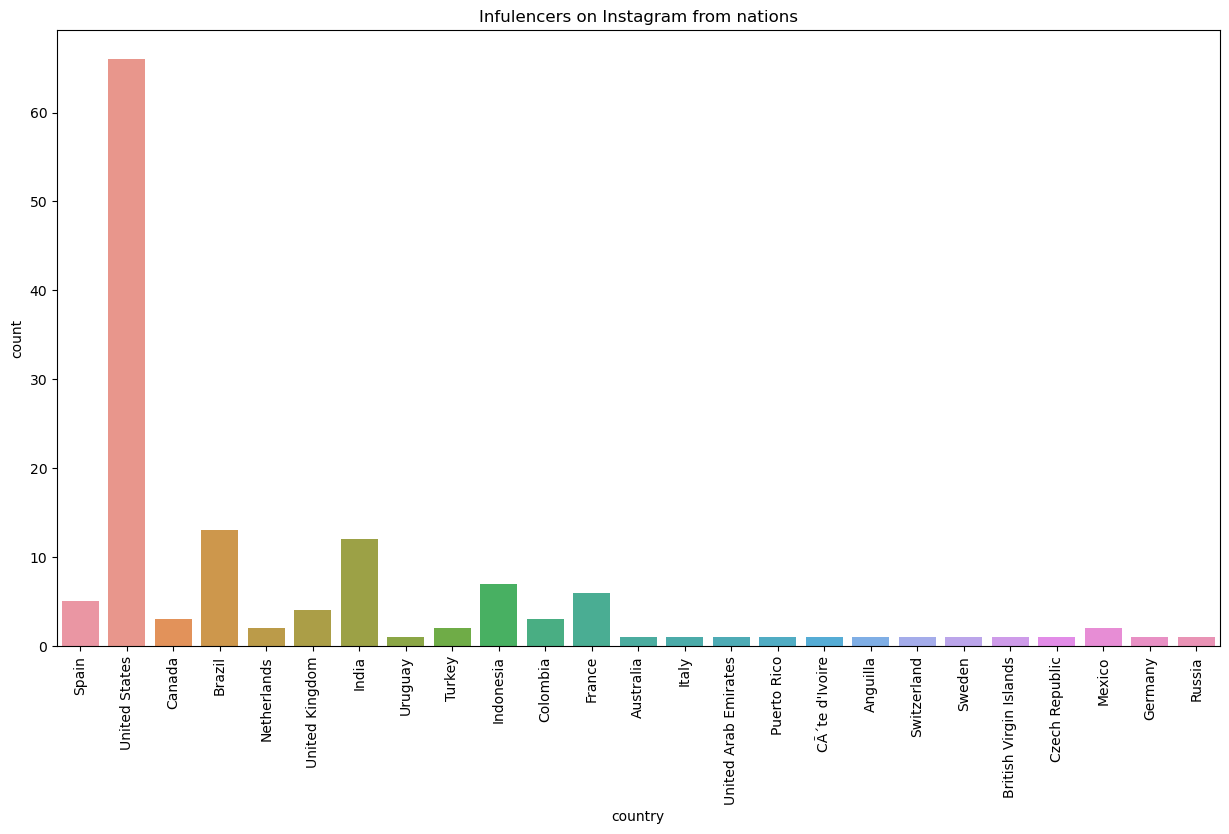

In [15]:
plt.figure(figsize=(15,8))
plt.title('Infulencers on Instagram from nations')
sns.countplot(x=df['country'])
#iterates every single value in x axis and based on their count of occurence it is taken at y axis 
# in x axis all overlapped so we will rotate the labels to 90 degrees 
plt.xticks(rotation=90)

In [17]:
#top 10 influencers
p=df.drop(['rank','influence_score','posts','followers','avg_likes','new_post_avg_like','total_likes','country'],axis=1)
p.head()

,channel_info,60_day_eng_rate
0,cristiano,1.39%
1,kyliejenner,1.62%
2,leomessi,1.24%
3,selenagomez,0.97%
4,therock,0.20%


In [ ]:
# plt.figure(figsize=(15,8))
# plt.title('Infulencers on Instagram from nations')
# sns.barplot(x=p['channel_info'],y=p['60_day_eng_rate'])
# plt.xticks(rotation=90)
#in bar plot we must have numbers on both xaxis and y axis so use pie chart
plt.pie(p['60_day_eng_rate'].astype(float),labels=p['channel_info'],autopct='0.2f')
#autopct-->autopercentage 
#values need to be float or int but it is string so convert to float using astype but this will not work since it has percentile symbol
#so instead use followers in the place of 60_day_eng_rate

In [24]:
p=df.drop(['rank','influence_score','posts','60_day_eng_rate','avg_likes','new_post_avg_like','total_likes','country'],axis=1)
p.head()

,channel_info,followers
0,cristiano,475.8m
1,kyliejenner,366.2m
2,leomessi,357.3m
3,selenagomez,342.7m
4,therock,334.1m


In [27]:
# plt.pie(p['followers'].astype(float),labels=p['channel_info'],autopct='0.2f')
# #error as data contains m at the end so remove it 
# plt.show()
x={'b':'e9','m':'e6','m':'e3','%':''}
converted_followers=p['followers'].replace(x,regex=True).astype(float)
converted_followers.head()

0    475800.0
1    366200.0
2    357300.0
3    342700.0
4    334100.0
Name: followers, dtype: float64

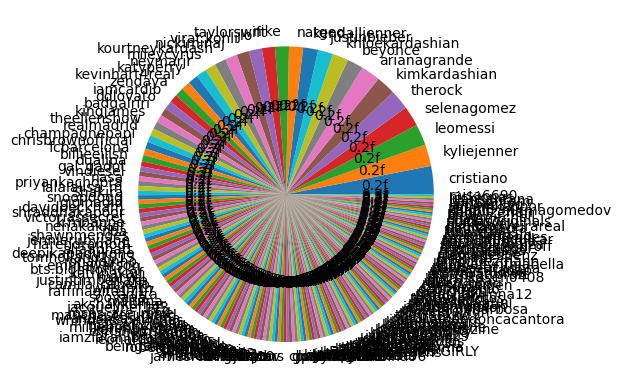

In [28]:
#now we can draw a pie chart
plt.pie(converted_followers,labels=p['channel_info'],autopct='0.2f')
plt.show()

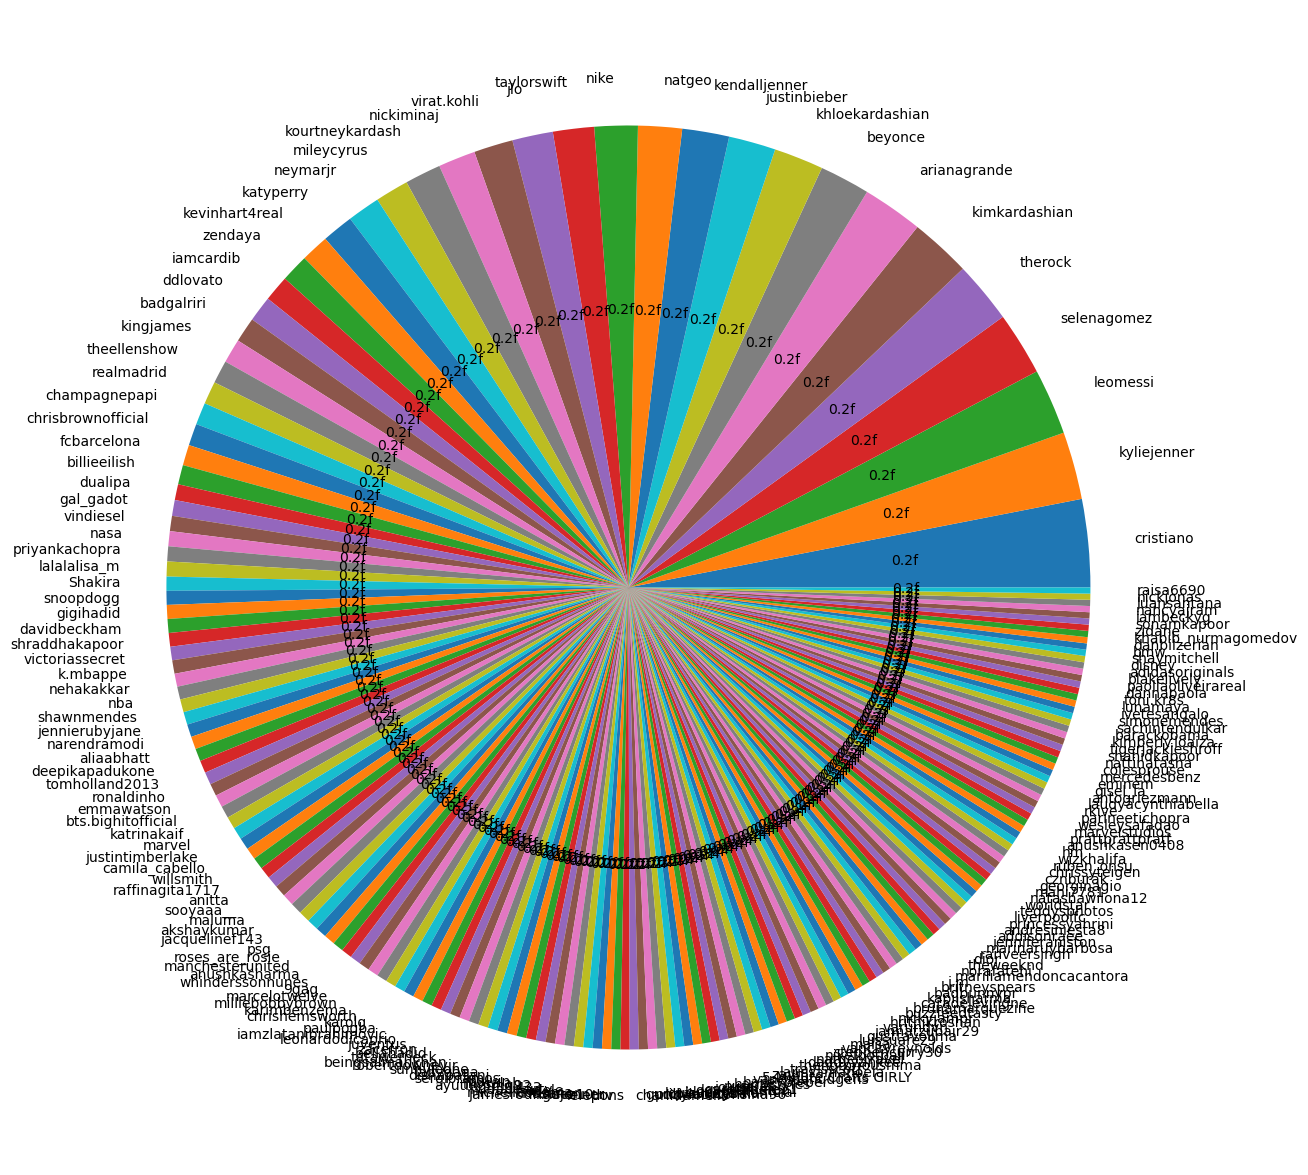

In [31]:

plt.figure(figsize=(30,15))
plt.pie(converted_followers,labels=p['channel_info'],autopct='0.2f')
plt.show()